In [2]:
import pandas as pd

In [3]:
dades = pd.read_csv(  r"C:\\DataScience\\string5\\LliguesUEFA.csv", sep= ";", encoding="ISO-8859-1")

In [4]:
dades.head(5)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


### Ejercicio 1 : Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [5]:
x=[]
for i in dades["Attendance"]:
    x.append(i)

In [6]:
from scipy.stats import shapiro
stat, p = shapiro(x)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.907, p=0.000
Probably not Gaussian


(array([26., 21., 12., 15.,  6.,  8.,  4.,  5.,  0.,  1.]),
 array([ 5870., 12598., 19326., 26054., 32782., 39510., 46238., 52966.,
        59694., 66422., 73150.]),
 <BarContainer object of 10 artists>)

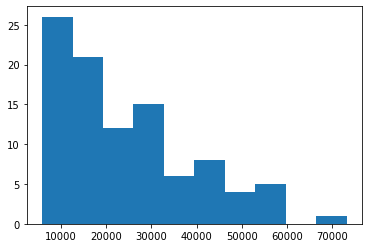

In [7]:
import matplotlib.pyplot as plt
plt.hist(x, 10)

## Exercici 2 Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

In [28]:
from scipy.stats import shapiro
stat, p = shapiro(dades["GD"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.986, p=0.396
Probably Gaussian


(array([ 2., 10., 13., 19., 19., 12., 12.,  5.,  3.,  3.]),
 array([-56. , -43.2, -30.4, -17.6,  -4.8,   8. ,  20.8,  33.6,  46.4,
         59.2,  72. ]),
 <BarContainer object of 10 artists>)

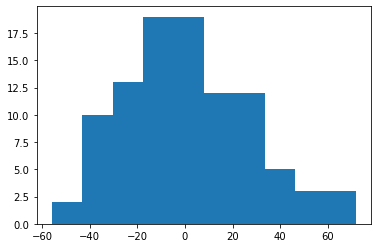

In [41]:
plt.hist(dades["GD"])

In [42]:
from scipy.stats import shapiro
stat, p = shapiro(dades["xGD"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.979, p=0.128
Probably Gaussian


(array([ 3., 12., 15., 22., 14., 15., 12.,  1.,  1.,  3.]),
 array([-40.4 , -30.43, -20.46, -10.49,  -0.52,   9.45,  19.42,  29.39,
         39.36,  49.33,  59.3 ]),
 <BarContainer object of 10 artists>)

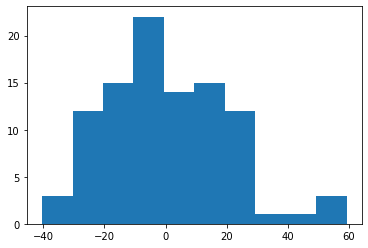

In [44]:
plt.hist(dades["xGD"])

In [14]:
from scipy.stats import shapiro
stat, p = shapiro(dades["xGD"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.979, p=0.128
Probably Gaussian


### 2 variables - correlacion   Quiero saber  si estas dos variables con distribución normal estan relacionadas ( es obvio que si pero voy a mirar con los datos)

In [25]:
from scipy.stats import pearsonr
stat, p = pearsonr(dades["GD"], dades["xGD"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.935, p=0.000
Probably dependent


### 2 variables regresion lineal

Pearson = 0.934700810299191 P-value= 6.47738061798361e-45
Probably dependent


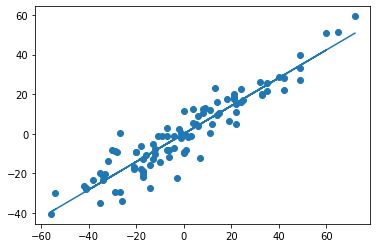

In [26]:
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r, pvalue, std_err = stats.linregress(dades["GD"], dades["xGD"])

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, dades["GD"]))

print("Pearson =", r, "P-value=", pvalue)

if pvalue > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')


plt.scatter(dades["GD"], dades["xGD"])
plt.plot(dades["GD"], mymodel)
plt.show() 

### Exercici 3 Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

#### Multiple regresion 

In [37]:
import pandas
from sklearn import linear_model

X = dades[["GD", 'Pts/G']]
y = dades["xGD"]

regr = linear_model.LinearRegression()
regr.fit(X, y)

display(regr.score(X,y))

0.8788207536237195

In [39]:
import pandas as pd , numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sma
from scipy import stats

X = dades[["GD", 'Pts/G']]
y = dades["xGD"]
X2= sma.add_constant (X)

_1  = sma.OLS(y, X2)
_2  = _1.fit()

print(_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    xGD   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     344.5
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           2.90e-44
Time:                        17:42:37   Log-Likelihood:                -328.68
No. Observations:                  98   AIC:                             663.4
Df Residuals:                      95   BIC:                             671.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.8771      8.423     -2.004      0.0

In [40]:
lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)
new_X = np.append(np.ones((len(X),1)), X, axis=1)
M_S_E = (sum((y-predictions)**2))/(len(new_X)-len(new_X[0]))
v_b = M_S_E*(np.linalg.inv(np.dot(new_X.T,new_X)).diagonal())
s_b = np.sqrt(v_b)
t_b = params/ s_b
p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X)-len(new_X[0])))) for i in t_b]
p_val = np.round(p_val,3)
p_val

array([0.048, 0.   , 0.047])

In [78]:
x=[]
for i in p_val:
    if i > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')


Probably dependent
Probably dependent
Probably dependent


el p value es menos a 0.05 por lo que rechazamos la hipotesis nula es decir que existiria una correlacion entre las variales selecciones lo cual era obvio 